Реализовать с помощью `Numpy` класс `MyMLP`, моделирующий работу полносвязной нейронной сети.

Реализуемый класс должен

1. Поддерживать создание любого числа слоев с любым числом нейронов. Тип инициализации весов не регламентируется.
2. Обеспечивать выбор следующих функции активации в рамках каждого слоя: `ReLU`, `sigmoid`, `linear`.
3. Поддерживать решение задачи классификации и регрессии (выбор соответствующего лосса, в том числе для задачи многоклассовой классификации).
4. В процессе обучения использовать самостоятельно реализованный механизм обратного распространения (вывод формул в формате markdown) для применения градиентного и стохастического градиентного спусков (с выбором размера батча)
5. Поддерживать использование `l1`, `l2` и `l1l2` регуляризаций.

In [ ]:
#!python3 -m pip install numpy pandas scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import time

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# TensorFlow / Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# PyTorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


In [ ]:
from sklearn.neural_network import MLPRegressor


### Sigmoid

Функция активации Sigmoid - это нелинейная функция, которая преобразует входное значение в диапазон от 0 до 1. Преименяется в задачах бинарной классификации, часто используется на последнем слое нейронной сети. Функция определяется следующим образом:

$
\sigma(x) = \frac{1}{1 + e^{-x}}
$

Самостоятельно рассчитайте градиент функции.

[Текст ссылки](https://)Основной недостаток сигмоиды - проблема затухающих градиентов.

При обратном распространении ошибки в глубоких нейронных сетях могут возникать проблемы с затуханием градиентов из-за плато сигмоидальной функции на концах (см. график функции).


### ReLU

Функция активации ReLU (Rectified Linear Unit) представляет собой простую нелинейную функцию, которая определяется следующим образом:

$
\text{ReLU}(x) = \max(0, x)
$

$
\text{ReLU}'(x) = \begin{cases} 1, & \text{если } x > 0 \\ 0, & \text{если } x \leq 0 \end{cases}
$


**Возможные преимущества ReLU:**

1. Вычисление ReLU очень простое и дешевое с вычислительной точки зрения

2. Обычно приводит к разреженным активациям в нейронной сети, что помогает уменьшить переобучение и улучшить обобщающую способность модели

3. ReLU не подвержена проблеме исчезающего градиента, которая может возникнуть при использовании сигмоидной функции активации

**Недостатки ReLU:**

1. Некоторые нейроны могут "умереть" и всегда выдавать ноль, из-за чего они перестают обновляться в процессе обучения. Это происходит, когда весовые суммы нейронов входят в область отрицательных значений и не активируются. В результате обучения такие нейроны могут оставаться неактивными и не приносить пользы

2. ReLU не центрирована относительно нуля

### Softmax

Функция активации Softmax используется в многоклассовой классификации в нейронных сетях. Она преобразует вектор реальных чисел в вектор вероятностей, где каждый элемент находится в диапазоне от 0 до 1 и сумма всех элементов равна 1.

Говоря более математическим языком, Softmax преобразует входной вектор $z$ в вероятностное распределение через нормализацию экспоненты каждого элемента вектора. Пусть $z$ - входной вектор размерности $(1, p)$, где $p$ - количество классов. Тогда Softmax определяется следующим образом:

$
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{p} e^{z_j}} \quad \text{для } i = 1, 2, ..., p
$

Где $z_i$ - i-ый элемент входного вектора $z$.

$
\frac{\partial \text{Softmax}(z_i)}{\partial z_j} = \text{Softmax}(z_i) \cdot (\delta_{ij} - \text{Softmax}(z_j))
$

Где $\delta_{ij}$ - символ Кронекера, который равен 1, если $i = j$, и 0 в противном случае.

**Примечание**

Сигмоида и Softmax чаще используются именно на выходном слое нейросети в задачах классификации - ими предсказывают вероятности принадлежности объектов к одному из классов, в то время как остальные рассмотренные функции активации используются внутри нейросети, то есть в скрытых слоях.

### Функция потерь

Функции потерь (loss functions) в нейронных сетях, как и в любых других алгоритмах машинного обучения, представляют собой метрики, которые используются для оценки того, насколько хорошо модель выполняет свою задачу во время обучения. Они измеряют расхождение между предсказанными значениями модели и фактическими значениями (целевыми), которые она пытается предсказать. Функции потерь выражаются в виде числового значения, которое показывает, насколько сильно модель ошибается на конкретном наборе данных.

Выбор правильной функции потерь зависит от типа задачи, которую решает нейронная сеть. Например, для задач регрессии часто используется среднеквадратичная ошибка (MSE), а для задач классификации - бинарная или категориальная кросс-энтропия.

Цель обучения нейронной сети состоит в минимизации функции потерь путем коррекции весов и смещений сети в процессе обратного распространения ошибки. Чем меньше значение функции потерь, тем лучше модель обучается предсказывать целевые значения.

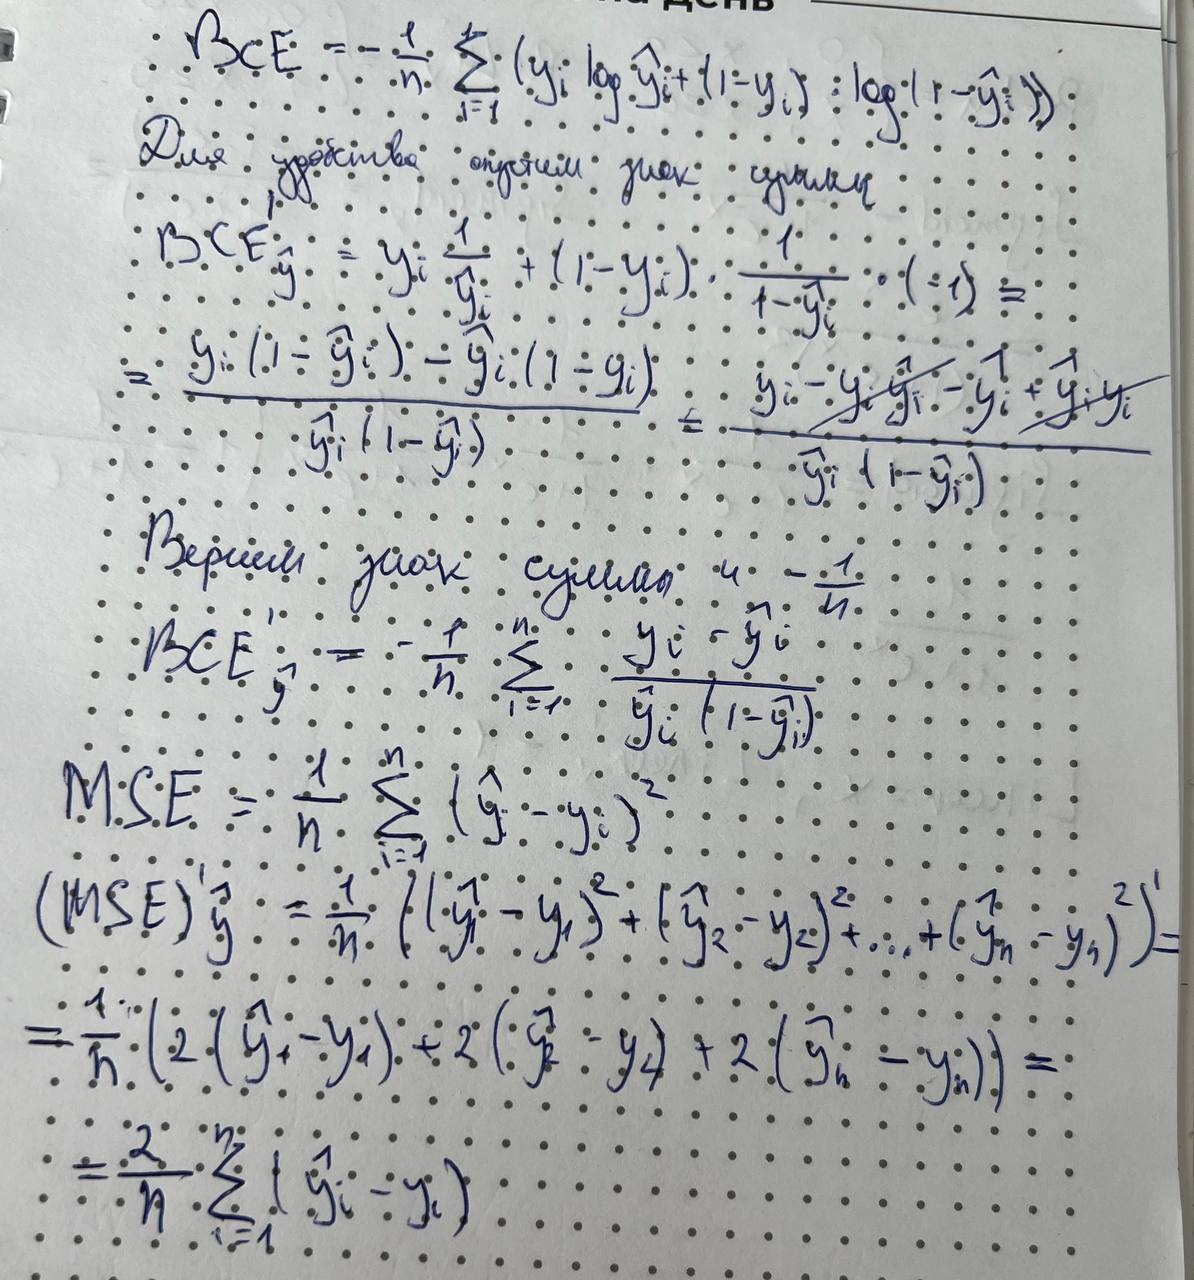

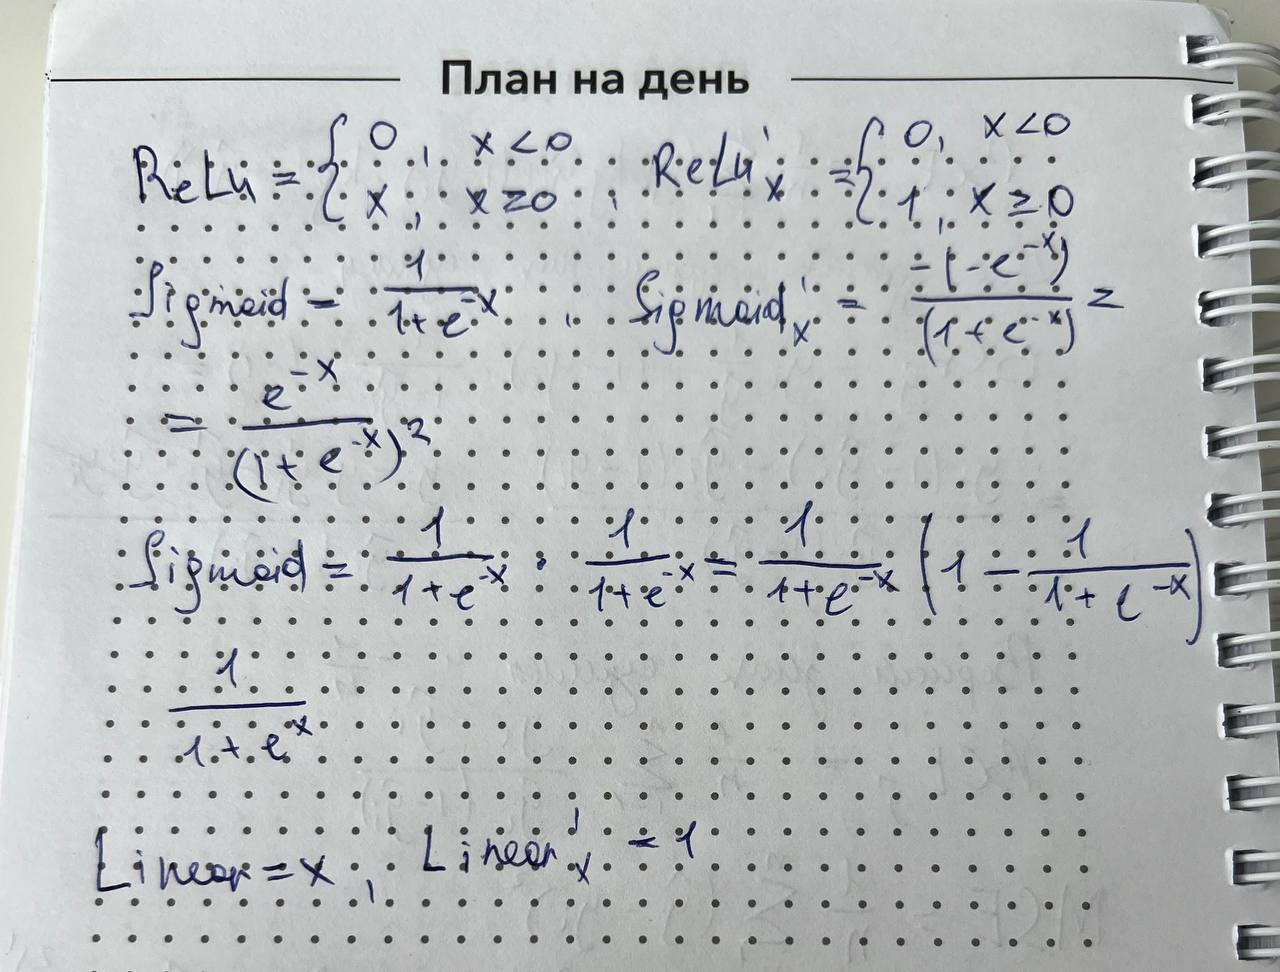

#### MSE

Функция потерь MSE (Mean Squared Error) применяется в задачах регресии.

Из-за квадратичного штрафа MSE более чувствительна к большим ошибкам.

Не инвариантна к масштабированию данных, значения могут зависеть от единиц измерения переменных.

$
L(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
$

Самостоятельно рассчитайте градиент функции по предсказанным значениям.

#### Binary Cross-Entropy (LogLoss)

Функция потерь Binary Cross Entropy (BCE), также известная как Log Loss, используется в задачах бинарной классификации.

Она вычисляет степень расхождения между предсказанными вероятностями и истинными метками.

Чувствительна к дисбалансу классов.

$ L(y, \hat{y}) = - \frac{1}{n} \sum_{i=1}^{n} \left( y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right) $

Самостоятельно рассчитайте градиент функции по предсказанным значениям.

#### Cross-Entropy

В задачах классификации категориальная кросс-энтропия используется как функция потерь для оценки разницы между предсказанными вероятностями классов и истинными метками классов.

Пусть у нас есть $ K $ классов, и для каждого примера $ i $ имеются предсказанные вероятности $ p_{i1}, p_{i2}, ..., p_{iK} $ для каждого класса. И пусть $ y_{ij} $ обозначает индикаторную переменную, которая равна 1, если пример $ i $ относится к классу $ j $, и 0 в противном случае.

Формула для категориальной кросс-энтропии выглядит следующим образом:

$
\text{Cross-entropy} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij} \log(p_{ij})
$

Эта формула измеряет среднюю "удалённость" между истинными метками $ y_{ij} $ и предсказанными вероятностями $ p_{ij} $. Она стремится к нулю, когда предсказанные вероятности близки к истинным меткам для всех примеров.

Градиент мультиклассовой кросс-энтропии по отношению к предсказанным вероятностям вычисляется следующим образом:

$
\frac{\partial \text{Cross-entropy}}{\partial p_{ij}} = -\frac{1}{N} \frac{y_{ij}}{p_{ij}}
$

Градиент показывает, как изменение вероятности $ p_{ij} $ влияет на значение функции потерь. Градиент стремится к бесконечности, когда предсказанная вероятность стремится к 0, и к нулю, когда предсказанная вероятность стремится к 1.

#### Regularization

Функция нужна для вычисления значения регуляризационного штрафа (регуляризации), который добавляется к функции потерь, чтобы избежать переобучения модели.

Регуляризация штрафует слишком большие веса в нейронной сети. Это помогает модели быть менее чувствительной к шуму в обучающем наборе данных и улучшает обобщающую способность.

Параметры функции:

  * weights: список всех весов сети (каждый элемент — это numpy.ndarray, матрица весов одного слоя).

  * reg_type: тип регуляризации:

      * 'l1' — L1-регуляризация (спарсит веса, зануляет лишние).

      * 'l2' — L2-регуляризация (сильно штрафует большие веса).

      * 'l1l2' — комбинация L1 и L2.

  * alpha: коэффициент регуляризации (влияет на силу штрафа).

In [ ]:
# функции активации

#используется как правило на выходе в бинарной классфиикации
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
#производная сигмоиды исполбьзуется в обратном распространении ошибки для вычисления градиента по входу активации
def dsigmoid(z):
    s = sigmoid(z)
    return s * (1 - s)
#простая и эффективная, не насыщается в положительной части  что помогает избегать затухающих градиентов
def relu(z):
    return np.maximum(0, z)

def drelu(z):
    return (z > 0).astype(float)

def linear(z):
    return z

def dlinear(z):
    return np.ones_like(z)

# Softmax для мультиклассовой классификации
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

class MyMLP:
    """
    Полносвязная нейронная сеть с поддержкой произвольного числа слоев и нейронов.

    Параметры:
        layers_dims: список размеров слоев, включая входной и выходной
        activations: список функций активации (relu, sigmoid, linear) для каждого слоя (кроме входного)
        task: regression, binary, multiclass
        reg: тип регуляризации: None, l1, l2, l1l2
        reg_lambda: коэффициент регуляризации
    """
    def __init__(self, layers_dims, activations, task='regression', reg=None, reg_lambda=0.0):
        assert len(layers_dims) - 1 == len(activations), "Количество активаций должно быть равно числу слоев"
        self.L = len(layers_dims) - 1
        self.layers_dims = layers_dims
        self.activations = activations
        self.task = task
        self.reg = reg
        self.reg_lambda = reg_lambda

        # иницализирую параметры
        self.weights = {}
        self.biases = {}
        for l in range(1, self.L + 1): #проходим по слоям кроме входного слвоя
            #инициализируем параметры дял каждого слоя
            #1 - число нейронов в текущем слое , числло нейронов в предыдущем
            self.weights[l] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2 / layers_dims[l-1]) #генерим матрицу с элементами из стандартного нормального распределения
            self.biases[l] = np.zeros((layers_dims[l], 1))

    def _activation(self, Z, kind):
        if kind == 'relu': return relu(Z)
        if kind == 'sigmoid': return sigmoid(Z)
        if kind == 'linear': return linear(Z)
        raise ValueError('Неизвестная функция активации')

    def _activation_deriv(self, Z, kind):
        if kind == 'relu': return drelu(Z)
        if kind == 'sigmoid': return dsigmoid(Z)
        if kind == 'linear': return dlinear(Z)
        raise ValueError('Неизвестная функция активации')

    def forward(self, X):
        """
        Метод forward отвечает за прямой проход  через всю сеть —
        от входного слоя до выхода — и одновременно собираю промежуточные значения (кеш),
        которые понадобятся при обратном распространении
        Прямое распространение
        X: shape (m, n_x) где m — число примеров в батче, а n_x — число признаков (входных нейронов)
        Возвращает Y_hat (выход) и кеши для обратного распространения
        """
        caches = [] #сораняю сюда резульатты (Z и A) для каждого слоя
        A = X.T #активация нулевого слоя
        caches.append(('A0', A))
        # пробегаю по все мскрытым слоям
        for l in range(1, self.L):
            Z = self.weights[l] @ A + self.biases[l]
            A = self._activation(Z, self.activations[l-1])
            caches.append((Z, A))
        # Выходной слой
        ZL = self.weights[self.L] @ A + self.biases[self.L]
        if self.task == 'multiclass':
            AL = softmax(ZL)
        else:
            AL = self._activation(ZL, self.activations[-1])
        caches.append((ZL, AL))
        return AL, caches

    def compute_loss(self, Y_hat, Y):
        """
        Вычисление функции потерь с добавлением регуляризации
        """
        m = Y.shape[0]
        loss = 0
        # Выбор лосса
        if self.task == 'regression': #mse
            loss = np.mean((Y_hat.T - Y) ** 2) / 2
        elif self.task == 'binary': #логистическая потеря
            eps = 1e-8
            Y_hat = np.clip(Y_hat, eps, 1 - eps)
            loss = -np.mean(Y * np.log(Y_hat.T) + (1 - Y) * np.log(1 - Y_hat.T))
        else:  # multiclass
            eps = 1e-8
            Y_onehot = np.eye(self.layers_dims[-1])[Y.flatten()]
            loss = -np.mean(np.sum(Y_onehot.T * np.log(Y_hat + eps), axis=0))
        # Регуляризация
        if self.reg in ['l2', 'l1l2']:
            l2_term = sum(np.sum(np.square(W)) for W in self.weights.values())
            loss += self.reg_lambda / (2 * m) * l2_term
        if self.reg in ['l1', 'l1l2']:
            l1_term = sum(np.sum(np.abs(W)) for W in self.weights.values())
            loss += self.reg_lambda / m * l1_term
        return loss

    def backward(self, caches, Y):
        """
        Обратное распространение
        """
        grads = {}
        m = Y.shape[0]
        # получаю последнюю активацию и Z
        ZL, AL = caches[-1]
        A_prev = caches[-2][1]
        # dZ для выходного слоя
        if self.task == 'regression':
            dZ = AL - Y.reshape(1, -1)
        elif self.task == 'binary':
            dZ = (AL - Y.T)  # для sigmoid + BCE
        else:  # multiclass
            Y_onehot = np.eye(self.layers_dims[-1])[Y.flatten()]
            dZ = AL - Y_onehot.T
        # градиенты параметров L-го слоя
        grads['dW' + str(self.L)] = (1 / m) * dZ @ A_prev.T
        grads['db' + str(self.L)] = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
        # доьавлю регуляризацию к dW
        if self.reg in ['l2', 'l1l2']:
            grads['dW' + str(self.L)] += (self.reg_lambda / m) * self.weights[self.L]
        if self.reg in ['l1', 'l1l2']:
            grads['dW' + str(self.L)] += (self.reg_lambda / m) * np.sign(self.weights[self.L])
        # dA для предыдущего слоя
        dA_prev = self.weights[self.L].T @ dZ
        # прохожу по скрытым слоям в обратном порядке
        for l in reversed(range(1, self.L)):
            Z, A = caches[l]
            A_prev = caches[l-1][1]
            dZ = dA_prev * self._activation_deriv(Z, self.activations[l-1])
            grads['dW' + str(l)] = (1 / m) * dZ @ A_prev.T
            grads['db' + str(l)] = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
            if self.reg in ['l2', 'l1l2']:
                grads['dW' + str(l)] += (self.reg_lambda / m) * self.weights[l]
            if self.reg in ['l1', 'l1l2']:
                grads['dW' + str(l)] += (self.reg_lambda / m) * np.sign(self.weights[l])
            dA_prev = self.weights[l].T @ dZ
        return grads

    def update_params(self, grads, lr):
        for l in range(1, self.L + 1):
            self.weights[l] -= lr * grads['dW' + str(l)]
            self.biases[l] -= lr * grads['db' + str(l)]

    def train(self, X, Y, epochs, lr=0.01, batch_size=32, verbose=False):
        """
        Обучение сети с выбором размер батча"""
        m = X.shape[0]
        for epoch in range(1, epochs + 1):
            perm = np.random.permutation(m)
            X_shuf = X[perm]
            Y_shuf = Y[perm]
            for i in range(0, m, batch_size):
                X_batch = X_shuf[i:i + batch_size]
                Y_batch = Y_shuf[i:i + batch_size]
                Y_hat, caches = self.forward(X_batch)
                grads = self.backward(caches, Y_batch)
                self.update_params(grads, lr)
            if verbose and epoch % max(1, epochs // 10) == 0:
                loss = self.compute_loss(self.forward(X)[0], Y)
                print(f"Эпоха {epoch}/{epochs}, Loss: {loss:.4f}")

    def predict(self, X):
        Y_hat, _ = self.forward(X)
        if self.task == 'regression':
            return Y_hat.T
        if self.task == 'binary':
            return (Y_hat > 0.5).astype(int).T
        # multiclass
        return np.argmax(Y_hat, axis=0)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, mean_squared_error
import time

class TorchNet(nn.Module):
    def __init__(self, layer_sizes, activations):
        super().__init__()
        layers = []
        for i in range(len(layer_sizes) - 1):
            layers.append(nn.Linear(layer_sizes[i], layer_sizes[i + 1]))
            if i < len(activations):
                if activations[i] == 'relu':
                    layers.append(nn.ReLU())
                elif activations[i] == 'sigmoid':
                    layers.append(nn.Sigmoid())
                elif activations[i] == 'tanh':
                    layers.append(nn.Tanh())
                elif activations[i] == 'linear':
                    pass  # No activation needed
                else:
                    raise ValueError(f"Unsupported activation: {activations[i]}")
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)


def train_and_evaluate_torch(X_train, y_train, X_test, y_test,
                              layer_sizes, activations,
                              task='classification',
                              lr=0.01, batch_size=25, epochs=100,
                              reg_type=None, reg_lambda=0.0):

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

    if task == 'classification':
        y_train_tensor = torch.tensor(y_train, dtype=torch.long)
        criterion = nn.CrossEntropyLoss()
    elif task == 'regression':
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
        criterion = nn.MSELoss()
    else:
        raise ValueError("Unsupported task")

    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)

    model = TorchNet(layer_sizes, activations)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=(reg_lambda if reg_type == 'l2' else 0.0))

    t0 = time.time()
    for epoch in range(epochs):
        for xb, yb in train_loader:
            out = model(xb)
            loss = criterion(out, yb)

            if reg_type == 'l1' or reg_type == 'l1l2':
                l1_penalty = sum(torch.sum(torch.abs(p)) for p in model.parameters())
                loss += reg_lambda * l1_penalty

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    train_time = time.time() - t0

    t0 = time.time()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        if task == 'classification':
            y_pred_labels = torch.argmax(y_pred, axis=1).numpy()
            score = accuracy_score(y_test, y_pred_labels)
        else:
            y_pred_labels = y_pred.numpy().flatten()
            score = mean_squared_error(y_test, y_pred_labels)
    infer_time = time.time() - t0

    print(f"PyTorch {'Accuracy' if task=='classification' else 'MSE'}:", score)
    print(f"Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")

    return score, train_time, infer_time


In [ ]:
X = np.array([[0.5, -1.5]])  # (1, 2) — один пример, два признака
Y = np.array([[1]])         # целевая переменная (1 или 0)

W1 = np.array([[0.1, -0.2],
               [0.4,  0.3]])   # (2, 2)
b1 = np.array([[0.0],
               [0.0]])         # (2, 1)

W2 = np.array([[0.2, -0.5]])   # (1, 2)
b2 = np.array([[0.0]])         # (1, 1)


In [ ]:
A0 = X.T
Z1 = W1 @ A0 + b1
A1 = relu(Z1)

In [ ]:
Z2 = W2 @ A1 + b2

In [ ]:
A2 = sigmoid(Z2)

In [ ]:
#функция потерь

loss = -(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))

In [ ]:
loss

array([[0.65875956]])

In [ ]:
#нахожу обратное распространение ошибки
#градиент ошибки по взоду последнего слоя
dZ2 = A2 - Y.T
# Градиент ошибки по весам последнего слоя
dW2 = dZ2 @ A1.T #показ как сильно ошибка зависит от кадлого веса
db2 = dZ2 # градиент ошибки по смещению и ее производная это просто градиент ошибки по входу


In [ ]:
#градиент по выходу последнего слоя
dA1 = W2.T @ dZ2 #градиент ошибки по активации скрытого слоя

dZ1 = dA1 * drelu(Z1)

In [ ]:
#градиенты по ввесам и смещениб скрытого первого слоя
dW1 = dZ1 @ A0.T
db1 = dZ1

In [ ]:
#обновление параметров  = параметр - learning rate * градиент
lr = 0.1
#есть веса и смещения первого слоя
#градиент первого слоя

W1 = W1 - lr * dW1
db1 = db1 - lr * db1

In [ ]:
W2 = W2 - lr * dW2
db2 = db2 - lr * db2

In [ ]:
#прямой проход

#перебираю epochs эпох, случайно перемешиваю данные и разбиваю на батчи

In [ ]:
#для каждого батча вызваем метод forward который
# 1 - транспонирует входы X_batch
# 2 - последовательно дял слоев
#   - считаем Z
#   - применяем нелинейность
# 3  - используем либо софтмах либо другую функцию


# Далее вычисляем потери (в конфе эпохи )
#Далее реализуем алгоритм обратного распространения (backward pass)
#-после прямого прохода мы знаем выходы и все промежуточные Z и A - далее считаем градиенты
#


Самостоятельно выбрать наборы данных (классификация и регрессия). Провести эксперименты (различные конфигурации сети: количество слоев, нейронов, функции активации, скорость обучения и тп. — минимум 5 различных конфигураций) и сравнить результаты работы (оценка качества модели + время обучения и инференса) реализованного класса `MyMLP` со следующими моделям (в одинаковых конфигурациях):

*   MLPClassifier/MLPRegressor из sklearn
*   TensorFlow
*   Keras
*   PyTorch

Результат представить в виде .ipynb блокнота, содержащего весь необходимый код и визуализации сравнения реализаций для рассмотренных конфигураций.


In [ ]:
#!python3 -m pip install matplotlib seaborn scikit-learn
#!python3 -m pip install tensorflow
#!python3 -m pip install torch
#!python3 -m pip install tensorflow --upgrade --no-cache-dir


# Датасеты

Набор данных Iris — это классический набор данных для задачи классификации, предназначенный для изучения методов распознавания видов ирисов. Набор содержит 150 записей, каждая из которых описывает отдельный цветок Iris. Для каждого образца собираются четыре измерения: длина и ширина чашелистика (sepal length, sepal width) и лепестка (petal length, petal width) в сантиметрах. Целевая переменная — вид цветка (три класса: Iris-setosa, Iris-versicolor и Iris-virginica).

Набор данных California Housing — это набор данных для задачи регрессии, предназначенный для прогнозирования цен на жильё в Калифорнии. Набор содержит информацию по 20 640 блокам (районам), собранную на основе переписи населения 1990 года. Для каждого блока приведены восемь регрессоров: медианный возраст жилья, среднее число комнат, среднее число спален, средняя плотность населения, процент жителей с низким доходом, процент людей без дома, средний доход домохозяйства и географические координаты (широта/долгота). Целевая переменная — медианная цена дома (в сотнях тысяч долларов США).

# Классификация

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

<ipython-input-6-23c56bce1494>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Вид ириса')


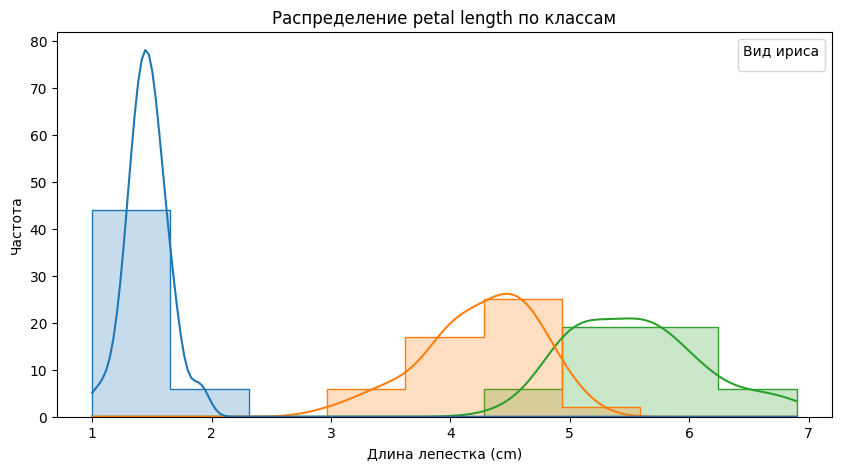

In [ ]:
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['target'] = y
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

plt.figure(figsize=(10, 5))
sns.histplot(data=iris_df, x='petal length (cm)', hue='species', kde=True, element="step")
plt.title("Распределение petal length по классам")
plt.xlabel('Длина лепестка (cm)')
plt.ylabel('Частота')
plt.legend(title='Вид ириса')
plt.show()

# Сценарий 1 - небольшая сеть и без регуляризации

In [ ]:
layers_dims = [4, 8, 3]
activations = ['relu', 'linear']
task = 'multiclass'
reg = None
reg_lambda = 0.0
lr = 0.01
batch_size = 25
epochs = 100


model = MyMLP(layers_dims, activations, task=task, reg=reg, reg_lambda=reg_lambda)

#обучение
t0 = time.time()
model.train(X_train, y_train, epochs=epochs, lr=lr, batch_size=batch_size, verbose=False)
train_time = time.time() - t0

#  Инференс
t0 = time.time()
y_pred = model.predict(X_test)
infer_time = time.time() - t0


print("MyMLP  Accuracy:", accuracy_score(y_test, y_pred))
print(f"MyMLP  Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")

MyMLP  Accuracy: 0.9333333333333333
MyMLP  Train time: 0.052s, Infer time: 0.000s


In [ ]:
#sklearn.MLPClassifier
# SKLEARN

t0 = time.time()
model_sk = MLPClassifier(
    hidden_layer_sizes=(8,),    # 1 скрытый слой с 8 нейронами
    activation='relu',
    solver='sgd',
    learning_rate_init=0.01,
    batch_size=25,
    max_iter=100,
    random_state=42
)
model_sk.fit(X_train, y_train)
train_time = time.time() - t0

t0 = time.time()
y_pred = model_sk.predict(X_test)
infer_time = time.time() - t0


print("Sklearn Accuracy:", accuracy_score(y_test, y_pred))
print(f"Sklearn Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")


Sklearn Accuracy: 1.0
Sklearn Train time: 0.163s, Infer time: 0.001s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#keras

y_train_oh = to_categorical(y_train, num_classes=3)
y_test_oh = to_categorical(y_test, num_classes=3)

model_keras = Sequential([
    Dense(8, activation='relu', input_shape=(4,)),  # скрытый слой
    Dense(3, activation='softmax')                  # выходной слой под multiclass
])
model_keras.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

t0 = time.time()
model_keras.fit(X_train, y_train_oh, epochs=100, batch_size=25, verbose=0)
train_time = time.time() - t0

t0 = time.time()
y_pred = model_keras.predict(X_test)
infer_time = time.time() - t0
y_pred_labels = np.argmax(y_pred, axis=1)



print("Keras Accuracy:", accuracy_score(y_test, y_pred_labels))
print(f"Keras Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Keras Accuracy: 0.9666666666666667
Keras Train time: 6.381s, Infer time: 0.127s


In [ ]:
layer_sizes = [4, 8, 3]
activations = ['relu', 'linear']
task = 'classification'
reg_type = None
reg_lambda = 0.0
lr = 0.01
batch_size = 25
epochs = 100

score, train_time, infer_time = train_and_evaluate_torch(
    X_train, y_train, X_test, y_test,
    layer_sizes, activations,
    task=task,
    lr=lr,
    batch_size=batch_size,
    epochs=epochs,
    reg_type=reg_type,
    reg_lambda=reg_lambda
)


PyTorch Accuracy: 1.0
Train time: 0.571s, Infer time: 0.001s


# Сценарий 2 - один широкий слой с L2 регуляризацией

In [ ]:
layers_dims = [4, 50, 3]
activations = ['relu', 'linear']
task = 'multiclass'
reg = 'l1'
reg_lambda = 0.1
lr = 0.01
batch_size = 25
epochs = 100


model = MyMLP(layers_dims, activations, task=task, reg=reg, reg_lambda=reg_lambda)

#обучение
t0 = time.time()
model.train(X_train, y_train, epochs=epochs, lr=lr, batch_size=batch_size, verbose=False)
train_time = time.time() - t0

#  Инференс
t0 = time.time()
y_pred = model.predict(X_test)
infer_time = time.time() - t0


print("MyMLP  Accuracy:", accuracy_score(y_test, y_pred))
print(f"MyMLP  Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")

MyMLP  Accuracy: 0.9333333333333333
MyMLP  Train time: 0.077s, Infer time: 0.000s


In [ ]:
hidden_size = 50
activation_hidden = 'relu'
output_size = 3
lr = 0.01
batch_size = 25
epochs = 100
regularization = 'l1'
reg_lambda = 0.1


In [ ]:
t0 = time.time()
model_sk = MLPClassifier(
    hidden_layer_sizes=(hidden_size,),
    activation='relu',
    solver='sgd',
    learning_rate_init=lr,
    batch_size=batch_size,
    max_iter=epochs,
    alpha=reg_lambda,        # это параметр регуляризации (L2 в sklearn)
    random_state=42
)
model_sk.fit(X_train, y_train)
train_time = time.time() - t0

t0 = time.time()
y_pred = model_sk.predict(X_test)
infer_time = time.time() - t0


print("Sklearn Accuracy:", accuracy_score(y_test, y_pred))
print(f"Sklearn Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")


Sklearn Accuracy: 0.9666666666666667
Sklearn Train time: 0.297s, Infer time: 0.005s


In [ ]:
#Keras
from tensorflow.keras.regularizers import l1, l2, l1_l2


# one-hot для keras
y_train_oh = to_categorical(y_train, num_classes=3)
y_test_oh = to_categorical(y_test, num_classes=3)

model_keras = Sequential([
    Dense(hidden_size, activation='relu', input_shape=(4,),
          kernel_regularizer=l1(reg_lambda)),
    Dense(3, activation='softmax')
])
model_keras.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

t0 = time.time()
model_keras.fit(X_train, y_train_oh, batch_size=batch_size, epochs=epochs, verbose=0)
train_time = time.time() - t0

t0 = time.time()
y_pred = model_keras.predict(X_test)
infer_time = time.time() - t0
y_pred_labels = np.argmax(y_pred, axis=1)


print("Keras Accuracy:", accuracy_score(y_test, y_pred_labels))
print(f"Keras Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Keras Accuracy: 0.8
Keras Train time: 17.745s, Infer time: 0.335s


In [ ]:
layer_sizes = [4, 50, 3]
activations = ['relu', 'linear']
task = 'classification'  # 'multiclass' эквивалентно этому в PyTorch
reg_type = 'l1'
reg_lambda = 0.1
lr = 0.01
batch_size = 25
epochs = 100

score, train_time, infer_time = train_and_evaluate_torch(
    X_train, y_train, X_test, y_test,
    layer_sizes, activations,
    task=task,
    lr=lr,
    batch_size=batch_size,
    epochs=epochs,
    reg_type=reg_type,
    reg_lambda=reg_lambda
)



PyTorch Accuracy: 0.6666666666666666
Train time: 1.492s, Infer time: 0.001s


# Сценарий 3 - Глубокая сеть  l1l2 регуляризацией




In [ ]:
layers_dims = [4, 12, 30, 10 , 6,3]
activations = ['sigmoid', 'relu', 'relu', 'sigmoid','linear']   # softmax на выходе под multiclass
task = 'multiclass'
reg = 'l1l2'
reg_lambda = 0.001
lr = 0.01
batch_size = 25
epochs = 100


model = MyMLP(layers_dims, activations, task=task, reg=reg, reg_lambda=reg_lambda)

#обучение
t0 = time.time()
model.train(X_train, y_train, epochs=epochs, lr=lr, batch_size=batch_size, verbose=False)
train_time = time.time() - t0

#  Инференс
t0 = time.time()
y_pred = model.predict(X_test)
infer_time = time.time() - t0



print("MyMLP  Accuracy:", accuracy_score(y_test, y_pred))
print(f"MyMLP  Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")

MyMLP  Accuracy: 0.9666666666666667
MyMLP  Train time: 0.255s, Infer time: 0.000s


In [ ]:
# Sklearn — не поддерживает l1l2 напрямую, но l2 поддерживается а вот д1 нет

t0 = time.time()
model_sk = MLPClassifier(
    hidden_layer_sizes=(12, 30, 10, 6),
    activation='relu',          # sigmoid для скрытых не поддерживается напрямую
    solver='sgd',
    learning_rate_init=0.01,
    batch_size=25,
    max_iter=100,
    alpha=0.001,                # L2
    random_state=42
)
model_sk.fit(X_train, y_train)
train_time = time.time() - t0

t0 = time.time()
y_pred = model_sk.predict(X_test)
infer_time = time.time() - t0


print("Sklearn Accuracy:", accuracy_score(y_test, y_pred))
print(f"Sklearn Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")


Sklearn Accuracy: 0.8666666666666667
Sklearn Train time: 0.159s, Infer time: 0.001s


In [ ]:
# one-hot
y_train_oh = to_categorical(y_train, num_classes=3)
y_test_oh = to_categorical(y_test, num_classes=3)

# модель
model_keras = Sequential([
    Dense(12, activation='sigmoid', input_shape=(4,), kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    Dense(30, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    Dense(10, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    Dense(6, activation='sigmoid', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    Dense(3, activation='softmax')  # выходной слой для мультикласса
])
model_keras.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

t0 = time.time()
model_keras.fit(X_train, y_train_oh, batch_size=25, epochs=100, verbose=0)
train_time = time.time() - t0

t0 = time.time()
y_pred = model_keras.predict(X_test)
infer_time = time.time() - t0
y_pred_labels = np.argmax(y_pred, axis=1)



print("Keras Accuracy:", accuracy_score(y_test, y_pred_labels))
print(f"Keras Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
Keras Accuracy: 0.4666666666666667
Keras Train time: 26.807s, Infer time: 0.378s


In [ ]:
layer_sizes = [4, 12, 30, 10, 6, 3]
activations = ['sigmoid', 'relu', 'relu', 'sigmoid', 'linear']
task = 'classification'  # multiclass == classification
reg_type = 'l1l2'
reg_lambda = 0.001
lr = 0.01
batch_size = 25
epochs = 100

score, train_time, infer_time = train_and_evaluate_torch(
    X_train, y_train, X_test, y_test,
    layer_sizes, activations,
    task=task,
    lr=lr,
    batch_size=batch_size,
    epochs=epochs,
    reg_type=reg_type,
    reg_lambda=reg_lambda
)



PyTorch Accuracy: 0.3333333333333333
Train time: 3.258s, Infer time: 0.002s


# Сценарий 4 -  Глубокая сеть с 3 скрытыми слоями и l1 регуляризацией



In [ ]:
layers_dims = [4, 5, 30, 10, 3]
activations = ['relu','relu', 'relu', 'linear']   # softmax на выходе под multiclass
task = 'multiclass'
reg = 'l2'
reg_lambda = 0.05
lr = 0.01
batch_size = 25
epochs = 100


model = MyMLP(layers_dims, activations, task=task, reg=reg, reg_lambda=reg_lambda)

#обучение
t0 = time.time()
model.train(X_train, y_train, epochs=epochs, lr=lr, batch_size=batch_size, verbose=False)
train_time = time.time() - t0

#  Инференс
t0 = time.time()
y_pred = model.predict(X_test)
infer_time = time.time() - t0


print("MyMLP  Accuracy:", accuracy_score(y_test, y_pred))
print(f"MyMLP  Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")

MyMLP  Accuracy: 0.9333333333333333
MyMLP  Train time: 0.316s, Infer time: 0.000s


In [ ]:
#MLPClassifier
t0 = time.time()
model_sk = MLPClassifier(
    hidden_layer_sizes=(5, 30, 10),
    activation='relu',
    solver='sgd',
    learning_rate_init=0.01,
    batch_size=25,
    max_iter=100,
    alpha=0.05,  # L2-регуляризация
    random_state=42
)
model_sk.fit(X_train, y_train)
train_time = time.time() - t0

t0 = time.time()
y_pred = model_sk.predict(X_test)
infer_time = time.time() - t0



print("Sklearn Accuracy:", accuracy_score(y_test, y_pred))
print(f"Sklearn Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")


Sklearn Accuracy: 1.0
Sklearn Train time: 0.262s, Infer time: 0.001s


In [ ]:
#Keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

y_train_oh = to_categorical(y_train, num_classes=3)
y_test_oh = to_categorical(y_test, num_classes=3)

model_keras = Sequential([
    Dense(5, activation='relu', input_shape=(4,), kernel_regularizer=l2(0.05)),
    Dense(30, activation='relu', kernel_regularizer=l2(0.05)),
    Dense(10, activation='relu', kernel_regularizer=l2(0.05)),
    Dense(3, activation='softmax')
])
model_keras.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

t0 = time.time()
model_keras.fit(X_train, y_train_oh, batch_size=25, epochs=100, verbose=0)
train_time = time.time() - t0

t0 = time.time()
y_pred = model_keras.predict(X_test)
infer_time = time.time() - t0
y_pred_labels = np.argmax(y_pred, axis=1)



print("Keras Accuracy:", accuracy_score(y_test, y_pred_labels))
print(f"Keras Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Keras Accuracy: 0.9333333333333333
Keras Train time: 14.604s, Infer time: 0.271s


In [ ]:
layer_sizes = [4, 5, 30, 10, 3]
activations = ['relu', 'relu', 'relu', 'linear']
task = 'classification'  # multiclass классификация
reg_type = 'l2'
reg_lambda = 0.05
lr = 0.01
batch_size = 25
epochs = 100

score, train_time, infer_time = train_and_evaluate_torch(
    X_train, y_train, X_test, y_test,
    layer_sizes, activations,
    task=task,
    lr=lr,
    batch_size=batch_size,
    epochs=epochs,
    reg_type=reg_type,
    reg_lambda=reg_lambda
)



PyTorch Accuracy: 0.6666666666666666
Train time: 1.231s, Infer time: 0.001s


# Сценарий 5 - Глубокая сеть с двумя скрытыми слоями и l1 регуляризацией

In [ ]:
layers_dims = [4, 50, 50, 3]
activations = ['relu','sigmoid','linear']   # softmax на выходе под multiclass
task = 'multiclass'
reg = 'l2'
reg_lambda = 0.1
lr = 0.05
batch_size = 25
epochs = 100


model = MyMLP(layers_dims, activations, task=task, reg=reg, reg_lambda=reg_lambda)

#обучение
t0 = time.time()
model.train(X_train, y_train, epochs=epochs, lr=lr, batch_size=batch_size, verbose=False)
train_time = time.time() - t0

#  Инференс
t0 = time.time()
y_pred = model.predict(X_test)
infer_time = time.time() - t0


print("MyMLP  Accuracy:", accuracy_score(y_test, y_pred))
print(f"MyMLP  Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")

MyMLP  Accuracy: 0.9
MyMLP  Train time: 0.120s, Infer time: 0.000s


In [ ]:
#Sklearn

In [ ]:
t0 = time.time()
model_sk = MLPClassifier(
    hidden_layer_sizes=(50, 50),      # два скрытых слоя
    activation='relu',                # ближайшее приближение
    solver='sgd',
    learning_rate_init=0.05,
    batch_size=25,
    max_iter=100,
    alpha=0.1,                        # L2-регуляризация
    random_state=42
)
model_sk.fit(X_train, y_train)
train_time = time.time() - t0

t0 = time.time()
y_pred = model_sk.predict(X_test)
infer_time = time.time() - t0



print("Sklearn Accuracy:", accuracy_score(y_test, y_pred))
print(f"Sklearn Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")


Sklearn Accuracy: 1.0
Sklearn Train time: 0.161s, Infer time: 0.001s


In [ ]:
#Keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

y_train_oh = to_categorical(y_train, num_classes=3)
y_test_oh = to_categorical(y_test, num_classes=3)

model_keras = Sequential([
    Dense(50, activation='relu', input_shape=(4,), kernel_regularizer=l2(0.1)),
    Dense(50, activation='sigmoid', kernel_regularizer=l2(0.1)),
    Dense(3, activation='softmax')
])
model_keras.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

t0 = time.time()
model_keras.fit(X_train, y_train_oh, batch_size=25, epochs=100, verbose=0)
train_time = time.time() - t0

t0 = time.time()
y_pred = model_keras.predict(X_test)
infer_time = time.time() - t0
y_pred_labels = np.argmax(y_pred, axis=1)


print("Keras Accuracy:", accuracy_score(y_test, y_pred_labels))
print(f"Keras Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Keras Accuracy: 0.7333333333333333
Keras Train time: 7.383s, Infer time: 0.121s


In [ ]:
layer_sizes = [4, 50, 50, 3]
activations = ['relu', 'sigmoid', 'linear']
task = 'classification'  # multiclass -> classification
reg_type = 'l2'
reg_lambda = 0.1
lr = 0.05
batch_size = 25
epochs = 100

score, train_time, infer_time = train_and_evaluate_torch(
    X_train, y_train, X_test, y_test,
    layer_sizes, activations,
    task=task,
    lr=lr,
    batch_size=batch_size,
    epochs=epochs,
    reg_type=reg_type,
    reg_lambda=reg_lambda
)




PyTorch Accuracy: 0.9333333333333333
Train time: 0.574s, Infer time: 0.001s


# Регрессия

In [ ]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X, y = data.data, data.target
#цены на жилье в Калифорнии

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Сценарий 1

In [ ]:
#  MyMLP
layers_dims = [8, 32, 1]
activations = ['relu', 'linear']
task = 'regression'
reg = 'l2'
reg_lambda = 0.01
lr = 0.01
batch_size = 25
epochs = 100

model = MyMLP(layers_dims, activations, task=task, reg=reg, reg_lambda=reg_lambda)

t0 = time.time()
model.train(X_train, y_train, epochs=epochs, lr=lr, batch_size=batch_size, verbose=False)
train_time = time.time() - t0

t0 = time.time()
y_pred = model.predict(X_test).flatten()
infer_time = time.time() - t0

print("MyMLP MSE:", mean_squared_error(y_test, y_pred))
print(f"MyMLP Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")


MyMLP MSE: 1.3105827322744221
MyMLP Train time: 6.551s, Infer time: 0.001s


In [ ]:
model_sk = MLPRegressor(
    hidden_layer_sizes=(32,),
    activation='relu',
    solver='sgd',
    learning_rate_init=0.001,  # снижено с 0.01
    batch_size=25,
    max_iter=100,
    alpha=0.01,
    random_state=42
)

t0 = time.time()
model_sk.fit(X_train, y_train)
train_time = time.time() - t0

t0 = time.time()
y_pred = model_sk.predict(X_test)
infer_time = time.time() - t0

mse = mean_squared_error(y_test, y_pred)
print("Sklearn MSE:", mse)
print(f"Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")



Sklearn MSE: 3.193196411417257e+31
Train time: 1.452s, Infer time: 0.002s


In [ ]:
# === Keras ===
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

model_keras = Sequential([
    Dense(32, activation='relu', input_shape=(8,), kernel_regularizer=l2(0.01)),
    Dense(1, activation='linear')
])
model_keras.compile(optimizer='sgd', loss='mse')

t0 = time.time()
model_keras.fit(X_train, y_train, batch_size=25, epochs=100, verbose=0)
train_time = time.time() - t0

t0 = time.time()
y_pred = model_keras.predict(X_test).flatten()
infer_time = time.time() - t0


print("Keras MSE:", mean_squared_error(y_test, y_pred))
print(f"Keras Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ValueError: Input contains NaN.

In [ ]:
# Параметры модели
layer_sizes = [8, 32, 1]
activations = ['relu', 'linear']
task = 'regression'
reg_type = 'l2'
reg_lambda = 0.01
lr = 0.01
batch_size = 25
epochs = 100

# Обучение и оценка
score, train_time, infer_time = train_and_evaluate_torch(
    X_train, y_train, X_test, y_test,
    layer_sizes, activations,
    task=task,
    lr=lr,
    batch_size=batch_size,
    epochs=epochs,
    reg_type=reg_type,
    reg_lambda=reg_lambda
)




array([[   1.6812    ,   25.        ,    4.19220056, ...,    3.87743733,
          36.06      , -119.01      ],
       [   2.5313    ,   30.        ,    5.03938356, ...,    2.67979452,
          35.14      , -119.46      ],
       [   3.4801    ,   52.        ,    3.97715472, ...,    1.36033229,
          37.8       , -122.44      ],
       ...,
       [   9.2298    ,   25.        ,    7.23767606, ...,    2.79049296,
          37.31      , -122.05      ],
       [   2.785     ,   36.        ,    5.28902954, ...,    2.58860759,
          36.77      , -119.76      ],
       [   3.5521    ,   17.        ,    3.98883929, ...,    3.72991071,
          34.22      , -118.37      ]])

# Сценарий 2

In [ ]:
model = MyMLP(
    layers_dims=[8, 32, 1],
    activations=['sigmoid', 'linear'],
    task='regression',
    reg=None,
    reg_lambda=0.0
)


t0 = time.time()
model.train(X_train, y_train, epochs=100, lr=0.001, batch_size=25, verbose=True)
train_time = time.time() - t0

t0 = time.time()
y_pred = model.predict(X_test).flatten()
infer_time = time.time() - t0

print("MyMLP MSE:", mean_squared_error(y_test, y_pred))
print(f"MyMLP Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")


In [ ]:
model_sk = MLPRegressor(
    hidden_layer_sizes=(32,),     # один скрытый слой
    activation='logistic',        # sigmoid
    solver='adam',
    learning_rate_init=0.001,
    batch_size=25,
    max_iter=100,
    alpha=0.0,                    # без регуляризации
    random_state=42
)

t0 = time.time()
model_sk.fit(X_train, y_train)
train_time = time.time() - t0

t0 = time.time()
y_pred = model_sk.predict(X_test)
infer_time = time.time() - t0

print("Sklearn MSE:", mean_squared_error(y_test, y_pred))
print(f"Sklearn Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")



In [ ]:
#keras s с l1 регуляризациекй


from tensorflow.keras.optimizers import SGD

model_keras = Sequential([
    Dense(32, activation='sigmoid', input_shape=(8,)),
    Dense(1, activation='linear')
])
model_keras.compile(optimizer=SGD(learning_rate=0.001), loss='mse')

t0 = time.time()
model_keras.fit(X_train, y_train, batch_size=25, epochs=100, verbose=1)
train_time = time.time() - t0

t0 = time.time()
y_pred = model_keras.predict(X_test).flatten()
infer_time = time.time() - t0

print("Keras MSE:", mean_squared_error(y_test, y_pred))
print(f"Keras Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")



In [ ]:
#PyTorch

layer_sizes = [8, 32, 1]
activations = ['sigmoid', 'linear']
task = 'regression'
reg_type = None
reg_lambda = 0.0
lr = 0.001
batch_size = 25
epochs = 100

score, train_time, infer_time = train_and_evaluate_torch(
    X_train, y_train, X_test, y_test,
    layer_sizes, activations,
    task=task,
    lr=lr,
    batch_size=batch_size,
    epochs=epochs,
    reg_type=reg_type,
    reg_lambda=reg_lambda
)



# Сценарий 3

In [ ]:
model = MyMLP(
    layers_dims=[8, 16, 1],
    activations=['sigmoid', 'linear'],
    task='regression',
    reg=None,
    reg_lambda=0.0
)

t0 = time.time()
model.train(X_train, y_train, epochs=100, lr=0.005, batch_size=25, verbose=False)
train_time = time.time() - t0

t0 = time.time()
y_pred = model.predict(X_test).flatten()
infer_time = time.time() - t0

mse = mean_squared_error(y_test, y_pred)
print("MyMLP MSE:", mse)
print(f"MyMLP Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")


<ipython-input-2-63abd9936d4f>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


MyMLP MSE: 1.310118179945528
MyMLP Train time: 6.553s, Infer time: 0.019s


In [ ]:
model_sk = MLPRegressor(
    hidden_layer_sizes=(16,),
    activation='logistic',        # sigmoid
    solver='adam',
    learning_rate_init=0.005,
    batch_size=25,
    max_iter=100,
    alpha=0.0,                    # no regularization
    random_state=42
)

t0 = time.time()
model_sk.fit(X_train, y_train)
train_time = time.time() - t0

t0 = time.time()
y_pred = model_sk.predict(X_test)
infer_time = time.time() - t0

mse = mean_squared_error(y_test, y_pred)
print("Sklearn MSE (no reg):", mse)
print(f"Sklearn Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")


Sklearn MSE (no reg): 1.3112611075153098
Sklearn Train time: 2.114s, Infer time: 0.002s


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_keras = Sequential([
    Dense(16, activation='sigmoid', input_shape=(8,)),  # без регуляризации
    Dense(1, activation='linear')
])
model_keras.compile(optimizer='sgd', loss='mse')

t0 = time.time()
model_keras.fit(X_train, y_train, batch_size=25, epochs=100, verbose=0)
train_time = time.time() - t0

t0 = time.time()
y_pred = model_keras.predict(X_test).flatten()
infer_time = time.time() - t0

mse = mean_squared_error(y_test, y_pred)
print("Keras MSE (no reg):", mse)
print(f"Keras Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")


In [ ]:
layer_sizes = [8, 16, 1]
activations = ['sigmoid', 'linear']
task = 'regression'
reg_type = None
reg_lambda = 0.0
lr = 0.005
batch_size = 25
epochs = 100

score, train_time, infer_time = train_and_evaluate_torch(
    X_train, y_train, X_test, y_test,
    layer_sizes, activations,
    task=task,
    lr=lr,
    batch_size=batch_size,
    epochs=epochs,
    reg_type=reg_type,
    reg_lambda=reg_lambda
)

#  Сценарий 4 - relu + l2 глуьокая и широкая архитектура



In [ ]:
model = MyMLP(
    layers_dims=[8, 32, 1],
    activations=['relu', 'linear'],
    task='regression',
    reg='l2',
    reg_lambda=0.001
)

t0 = time.time()
model.train(X_train, y_train, lr=0.001, epochs=20, batch_size=25)
train_time = time.time() - t0

y_pred = model.predict(X_test).flatten()
infer_time = time.time() - t0

print("MyMLP MSE:", mean_squared_error(y_test, y_pred))
print(f"MyMLP Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")

MyMLP MSE: 16528873070097.25
MyMLP Train time: 1.078s, Infer time: 1.079s


In [ ]:


model_sk = MLPRegressor(
    hidden_layer_sizes=(32,),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=20,
    batch_size=25,
    alpha=0.001,  # L2-регуляризация
    random_state=42
)

t0 = time.time()
model_sk.fit(X_train, y_train)
train_time = time.time() - t0

t0 = time.time()
y_pred = model_sk.predict(X_test)
infer_time = time.time() - t0

print("Sklearn MSE:", mean_squared_error(y_test, y_pred))
print(f"Sklearn Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")


Sklearn MSE: 0.6685581983138985
Sklearn Train time: 2.735s, Infer time: 0.002s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:


model_keras = Sequential([
    Dense(32, activation='relu', input_shape=(8,), kernel_regularizer=l2(0.001)),
    Dense(1, activation='linear')
])
model_keras.compile(optimizer='adam', loss='mse')

t0 = time.time()
model_keras.fit(X_train, y_train, batch_size=25, epochs=20, verbose=0)
train_time = time.time() - t0

t0 = time.time()
y_pred = model_keras.predict(X_test).flatten()
infer_time = time.time() - t0

print("Keras MSE:", mean_squared_error(y_test, y_pred))
print(f"Keras Train time: {train_time:.3f}s, Infer time: {infer_time:.3f}s")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Keras MSE: 1.150061710816804
Keras Train time: 49.920s, Infer time: 0.445s


In [ ]:
score, train_time, infer_time = train_and_evaluate_torch(
    X_train, y_train, X_test, y_test,
    layer_sizes=[8, 32, 1],
    activations=['relu', 'linear'],
    task='regression',
    lr=0.001,
    batch_size=25,
    epochs=20,
    reg_type='l2',
    reg_lambda=0.001
)


PyTorch MSE: 1.3104806970900715
Train time: 13.129s, Infer time: 0.002s


Самостоятельно выбрать наборы данных (классификация и регрессия). Провести эксперименты (различные конфигурации сети: количество слоев, нейронов, функции активации, скорость обучения и тп. — минимум 5 различных конфигураций) и сравнить результаты работы (оценка качества модели + время обучения и инференса) реализованного класса `MyMLP` со следующими моделям (в одинаковых конфигурациях):

*   MLPClassifier/MLPRegressor из sklearn
*   TensorFlow
*   Keras
*   PyTorch

Результат представить в виде .ipynb блокнота, содержащего весь необходимый код и визуализации сравнения реализаций для рассмотренных конфигураций.
